In [53]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
print(df.shape)

(768, 9)


In [54]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [56]:
df.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [57]:
####  make model
## 1 step split the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# x = df.loc[:,df.columns != 'Outcome'] # X = df.drop('Outcome') # x = df.loc[:,0:8]
x = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] ###how to use iloc
y = df.Outcome
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(614, 8)
(154, 8)


In [58]:
mod=LogisticRegression()
mod.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
### score of training data
score = mod.score(x_train,y_train)
score

0.7736156351791531

In [60]:
### score of testing data
score = mod.score(x_test,y_test)
score

0.7922077922077922

In [61]:
mod.coef_

array([[ 1.13965723e-01,  2.74561152e-02, -1.23142351e-02,
        -8.80247671e-04, -4.19988122e-04,  4.67529025e-02,
         7.59200291e-01,  6.04653350e-03]])

<BarContainer object of 8 artists>

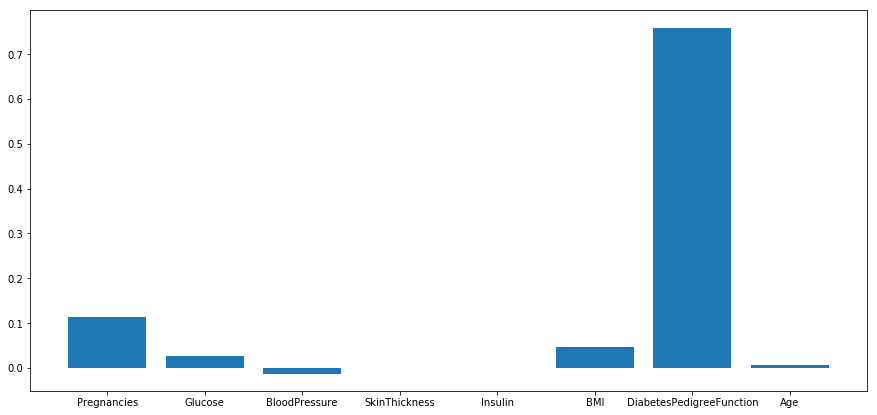

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize = [15,7])
plt.bar(list(df.columns[df.columns != 'Outcome']),mod.coef_[0])

In [63]:
#### scaling the training data 
### scaling can in increase the accuracy in some sense , because reduce the biase
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled=scaler.transform(x_train)
mod2=LogisticRegression()
mod2.fit(x_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
mod2.coef_

array([[ 0.40068091,  1.10972324, -0.13874077, -0.01638858, -0.11374957,
         0.61852686,  0.35683679,  0.1710686 ]])

<BarContainer object of 8 artists>

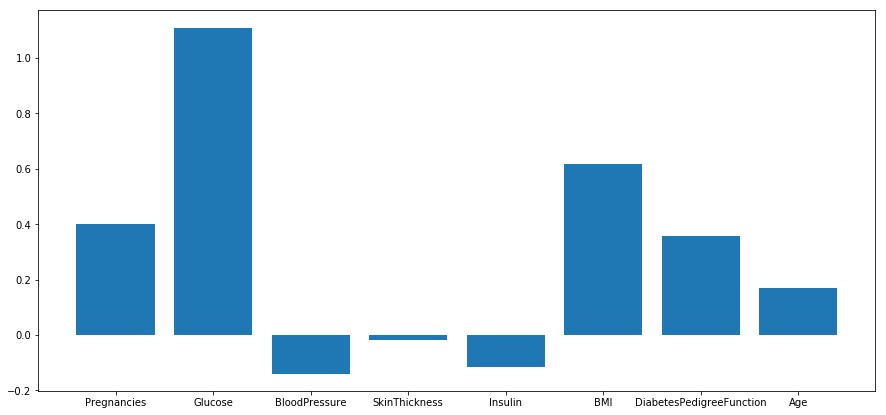

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize = [15,7])
plt.bar(list(df.columns[df.columns != 'Outcome']),mod2.coef_[0])

In [66]:
score1 = mod2.score(x_train_scaled,y_train)
score1

0.7768729641693811

In [67]:
score2 = mod2.score(scaler.transform(x_test),y_test)
score2

0.7662337662337663

In [68]:
###
mod.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [69]:
prob_test = mod.predict_proba(x_test) #### the probability you get 0 and 1
prob_test
### with probability we can pick some certain points

array([[0.87662433, 0.12337567],
       [0.6438783 , 0.3561217 ],
       [0.54730999, 0.45269001],
       [0.91193191, 0.08806809],
       [0.90321987, 0.09678013],
       [0.82596205, 0.17403795],
       [0.79449057, 0.20550943],
       [0.81390418, 0.18609582],
       [0.92761296, 0.07238704],
       [0.90590152, 0.09409848],
       [0.72517872, 0.27482128],
       [0.7186747 , 0.2813253 ],
       [0.48184295, 0.51815705],
       [0.303841  , 0.696159  ],
       [0.51353679, 0.48646321],
       [0.77669266, 0.22330734],
       [0.39692372, 0.60307628],
       [0.66594767, 0.33405233],
       [0.65143919, 0.34856081],
       [0.65189259, 0.34810741],
       [0.87016244, 0.12983756],
       [0.82808931, 0.17191069],
       [0.9225511 , 0.0774489 ],
       [0.8075755 , 0.1924245 ],
       [0.78295144, 0.21704856],
       [0.92229978, 0.07770022],
       [0.82747749, 0.17252251],
       [0.93940691, 0.06059309],
       [0.69002001, 0.30997999],
       [0.82080842, 0.17919158],
       [0.

# 5.4 new

Text(0.5,0,'Probability of being 1')

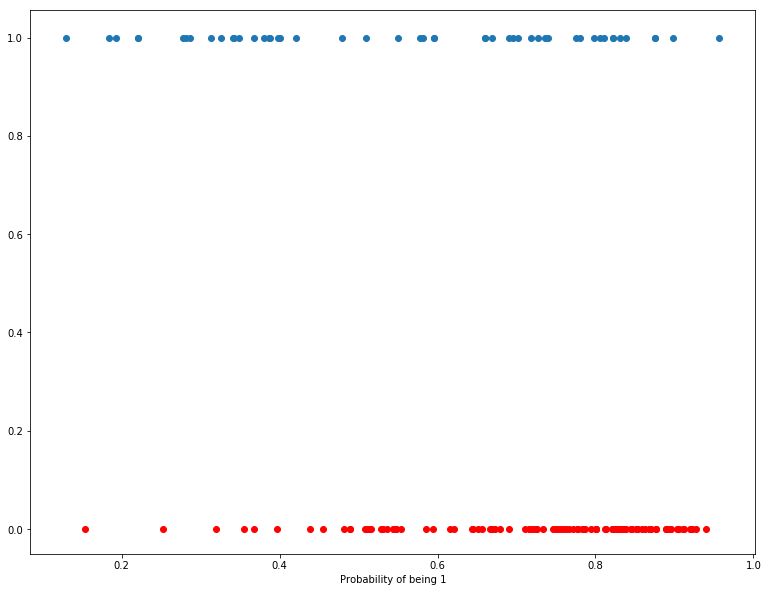

In [80]:
#####
plt.figure(figsize = (13,10))
## pick 1 column of y_test = 1 
plt.scatter(prob_test[y_test == 1,1],y_test[y_test ==1])
plt.scatter(prob_test[y_test == 0,0],y_test[y_test ==0],c= 'r',marker = 'o')
plt.xlabel("Probability of being 1")

(array([21.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 29.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

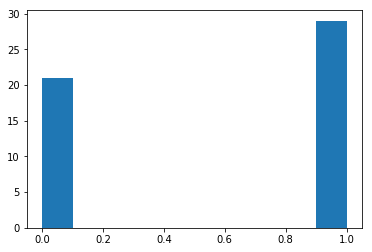

In [81]:
test_pred = mod.predict(x_test)
plt.hist(test_pred[y_test == 1])

(array([93.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

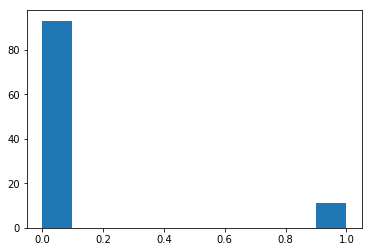

In [82]:
plt.hist(test_pred[y_test == 0])

(array([21., 30., 17., 10.,  7., 11.,  3.,  3.,  1.,  1.]),
 array([0.06059309, 0.13917443, 0.21775577, 0.29633711, 0.37491844,
        0.45349978, 0.53208112, 0.61066246, 0.6892438 , 0.76782513,
        0.84640647]),
 <a list of 10 Patch objects>)

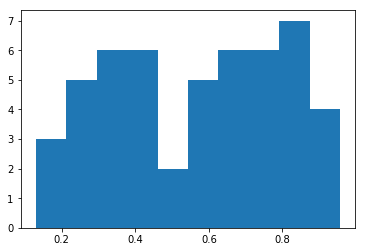

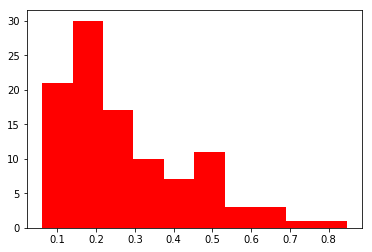

In [83]:
plt.hist(prob_test[y_test == 1,1])
plt.figure()
plt.hist(prob_test[y_test == 0,1],color = 'r')

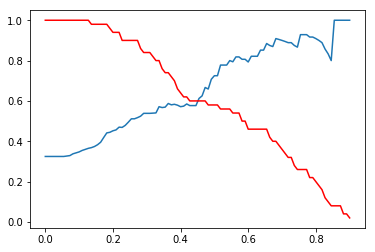

In [84]:
from sklearn import metrics
import numpy as np
thresholds = np.linspace(0,0.9,100)
percision_list = []
recall_list = []
for threshold in thresholds:
    pred = prob_test[:,1]>threshold
    percision_list.append(metrics.precision_score(y_test,pred))
    recall_list.append(metrics.recall_score(y_test,pred))
    
plt.plot(thresholds,percision_list)
plt.plot(thresholds,recall_list,c = 'r')

In [85]:
pred = prob_test[:,1]> 0.5
pred[0:20]

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False])

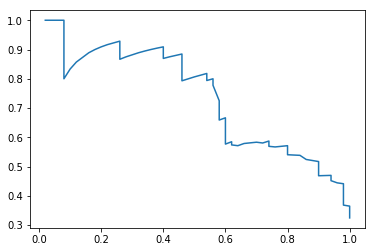

In [88]:
plt.plot(recall_list,percision_list)

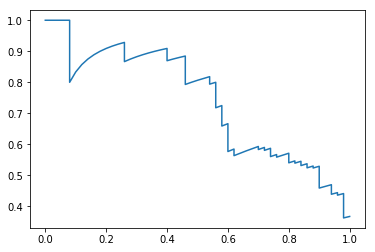

In [90]:
per,rec,_ = metrics.precision_recall_curve(y_test,prob_test[:,1])
plt.plot(rec,per)

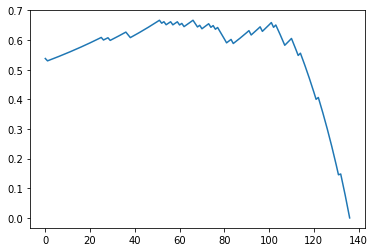

In [96]:
###f1 score
f1 = 2*per*rec/(per+rec)
plt.plot(f1)

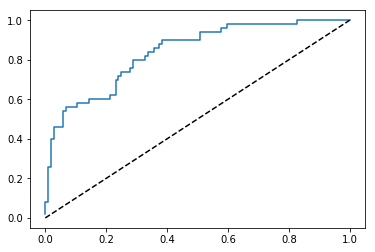

In [98]:
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_test[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')

## maxmize the accuracy, the further the better

In [99]:
metrics.auc(fpr,tpr)

0.8373076923076923